<a href="https://colab.research.google.com/github/nivedha75/Columbia-Summer-Coursework/blob/master/Copy_of_ImprovingYourModel_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load our data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df_titanic = pd.read_csv('/content/gdrive/My Drive/titanic (1).csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


```
df_titanic.head()
```

In [ ]:
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


```
import seaborn as sns
sns.boxplot(x='Survived', y="Age", data=df_titanic)
```

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


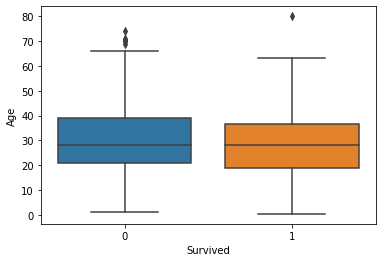

In [ ]:
import seaborn as sns
sns.boxplot(x='Survived', y="Age", data=df_titanic)

```
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1
```

In [ ]:
df_titanic['familysize'] = df_titanic['Siblings/Spouses Aboard'] + df_titanic['Parents/Children Aboard'] + 1

```
sns.boxplot(x='Survived', y="familysize", data=df_titanic)
```



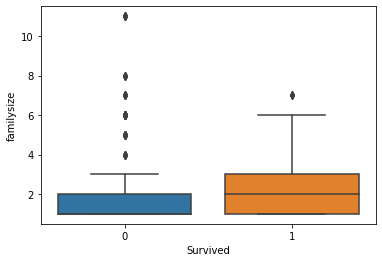

In [ ]:
sns.boxplot(x='Survived', y="familysize", data=df_titanic)

```
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1

pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)
```

In [ ]:
df_titanic['alone'] = 0
df_titanic.loc[df_titanic['familysize'] == 1,'alone'] = 1
 
pd.crosstab(df_titanic.Survived, df_titanic.alone).apply(lambda r: r/r.sum(), axis=1)

alone,0,1
Survived,,
0,0.321101,0.678899
1,0.523392,0.476608


## 3. Standardize the data


```
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])


df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])

df_titanic = df_titanic.join(df_scaled)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df_titanic[['Fare','Age','familysize']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['Fare_scaled',
 'Age_scaled','familysize_scaled'])
 
df_titanic = df_titanic.join(df_scaled)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,familysize,alone,Fare_scaled,Age_scaled,familysize_scaled
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,2,0,-0.503586,-0.529366,0.056543
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,2,0,0.783412,0.604265,0.056543
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,1,-0.490020,-0.245958,-0.562638
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,2,0,0.417948,0.391709,0.056543
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,1,-0.487507,0.391709,-0.562638


## 4. Run the models - with Cross-Validation


```
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Pclass'], prefix = 'pclass'))
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Sex'], prefix = 'sex'))
```

In [ ]:
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Pclass'], prefix = 'pclass'))
df_titanic = df_titanic.join(pd.get_dummies(df_titanic['Sex'], prefix = 'sex'))

```
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=10)
 
X = df_titanic[['Age_scaled','Fare_scaled','familysize_scaled','alone','sex_female','pclass_1','pclass_2','pclass_3']]
y = df_titanic['Survived']
 
 
print(np.mean(cross_val_score(LR, X, y, cv=5, scoring = 'f1_macro')))
print(np.mean(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
 
LR = LogisticRegression()
KNN = KNeighborsClassifier(n_neighbors=10)
 
X = df_titanic[['Age_scaled','Fare_scaled','familysize_scaled','alone','sex_female','pclass_1','pclass_2','pclass_3']]
y = df_titanic['Survived']
 
 
print(np.mean(cross_val_score(LR, X, y, cv=5, scoring = 'f1_macro')))
print(np.mean(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')))

0.7815133539986352
0.7827111686277197


```
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs = SFS(LR, 
          k_features=8, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()
```

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
 
sfs = SFS(LR, 
          k_features=8, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


{1: {'avg_score': 0.7696868286390023,
  'ci_bound': 0.03046810230546684,
  'cv_scores': array([0.7923541 , 0.79118485, 0.77047502, 0.72692847, 0.7674917 ]),
  'feature_idx': (4,),
  'feature_names': ('sex_female',),
  'std_dev': 0.02370521869522817,
  'std_err': 0.011852609347614083},
 2: {'avg_score': 0.7729021660300491,
  'ci_bound': 0.03192831992907759,
  'cv_scores': array([0.7923541 , 0.79655775, 0.77047502, 0.72692847, 0.77819549]),
  'feature_idx': (2, 4),
  'feature_names': ('familysize_scaled', 'sex_female'),
  'std_dev': 0.024841317614789308,
  'std_err': 0.012420658807394654},
 3: {'avg_score': 0.7817548662963618,
  'ci_bound': 0.026379490829959117,
  'cv_scores': array([0.80612662, 0.79531926, 0.77047502, 0.74786325, 0.78899018]),
  'feature_idx': (2, 4, 7),
  'feature_names': ('familysize_scaled', 'sex_female', 'pclass_3'),
  'std_dev': 0.02052414006371328,
  'std_err': 0.010262070031856639},
 4: {'avg_score': 0.790331699827139,
  'ci_bound': 0.018145701397619732,
  'cv_sc

```
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
```

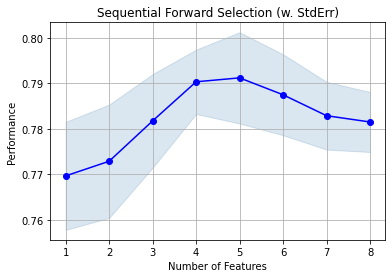

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

```
sfs = SFS(KNN, 
          k_features=8, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()
```

In [ ]:
sfs = SFS(KNN, 
          k_features=8, 
          scoring='f1_macro',
          cv=5)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

{1: {'avg_score': 0.6874080467906365,
  'ci_bound': 0.19954515972964598,
  'cv_scores': array([0.7923541 , 0.37979094, 0.77047502, 0.72692847, 0.7674917 ]),
  'feature_idx': (4,),
  'feature_names': ('sex_female',),
  'std_dev': 0.15525291347458656,
  'std_err': 0.07762645673729328},
 2: {'avg_score': 0.7799661581776309,
  'ci_bound': 0.01929632377554549,
  'cv_scores': array([0.7994058 , 0.78189244, 0.78511221, 0.75315573, 0.7802646 ]),
  'feature_idx': (2, 4),
  'feature_names': ('familysize_scaled', 'sex_female'),
  'std_dev': 0.015013195456914362,
  'std_err': 0.00750659772845718},
 3: {'avg_score': 0.8080934142873565,
  'ci_bound': 0.02831480092977454,
  'cv_scores': array([0.83245932, 0.80852494, 0.80005477, 0.77118644, 0.82824159]),
  'feature_idx': (0, 2, 4),
  'feature_names': ('Age_scaled', 'familysize_scaled', 'sex_female'),
  'std_dev': 0.02202987707021456,
  'std_err': 0.01101493853510728},
 4: {'avg_score': 0.8067500426776222,
  'ci_bound': 0.02914329761670788,
  'cv_scor

```
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
```

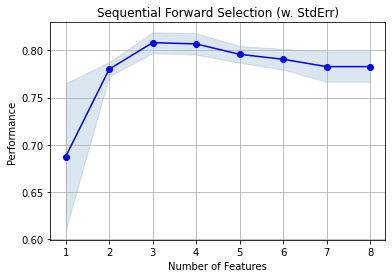

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

```
X = df_titanic[['Age_scaled', 'familysize_scaled', 'sex_female']]
y = df_titanic['Survived']

print(np.mean(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
X = df_titanic[['Age_scaled', 'familysize_scaled', 'sex_female']]
y = df_titanic['Survived']
 
print(np.mean(cross_val_score(KNN, X, y, cv=5, scoring = 'f1_macro')))

0.8080934142873565


### Bagging

```
from sklearn.ensemble import BaggingClassifier

baggedKNN = BaggingClassifier(base_estimator=KNN)
print(np.mean(cross_val_score(baggedKNN, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
from sklearn.ensemble import BaggingClassifier
 
baggedKNN = BaggingClassifier(base_estimator=KNN)
print(np.mean(cross_val_score(baggedKNN, X, y, cv=5, scoring = 'f1_macro')))

0.7976706420661561


```
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
print(np.mean(cross_val_score(DT, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
DT = DecisionTreeClassifier()
print(np.mean(cross_val_score(DT, X, y, cv=5, scoring = 'f1_macro')))

0.7412609688241767


```
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=5)
print(np.mean(cross_val_score(RF, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
RF = RandomForestClassifier(max_depth=5)#max_depth is a hyperparameter
print(np.mean(cross_val_score(RF, X, y, cv=5, scoring = 'f1_macro')))

0.8112839703498154


### Boosting

```
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

AB = AdaBoostClassifier()
GB = GradientBoostingClassifier()
print(np.mean(cross_val_score(AB, X, y, cv=5, scoring = 'f1_macro')))
print(np.mean(cross_val_score(GB, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
 
AB = AdaBoostClassifier()
GB = GradientBoostingClassifier()
print(np.mean(cross_val_score(AB, X, y, cv=5, scoring = 'f1_macro')))
print(np.mean(cross_val_score(GB, X, y, cv=5, scoring = 'f1_macro')))

0.8005685284448809
0.8049834802292486


### Hyper Parameter Tuning

```
for n in range(1,10):
  print(n)
  RF = RandomForestClassifier(max_depth=n)
  print(np.mean(cross_val_score(RF, X, y, cv=5, scoring = 'f1_macro')))
```

In [ ]:
for n in range(1,10):
  print(n)
  RF = RandomForestClassifier(max_depth=n)
  print(np.mean(cross_val_score(RF, X, y, cv=5, scoring = 'f1_macro')))

1
0.6677637618839061
2
0.7933773959234868
3
0.8019344074953164
4
0.8060785963278476
5
0.8074148942805659
6
0.8033899283030618
7
0.7973422221353846
8
0.8038775275612358
9
0.7892871103276949


In [ ]:
#gridsearchcv lets you check a bunch of combinations of hyperparameters

### Challenge

- Using your Boston Housing Dataset, see if you can improve your best model for predicting median home values using boosting.
- Research and apply a Random Forest Regressor model (a bagging method) to predict median home values. Does it improve your model?
- In both cases, spend some time tuning the hyperparameters to see if you can improve performance. 